# Space Weather online and software tools

This lecture is part of the Space Weather course of KU Leuven, March 2020.

At the end of this lecture you will be able to:

- Identify the most recent and future space missions with used to study Space Weather.
- Retrive and visualize data from some of these missions.
- Follow Space Weather events from the Sun to the Earth.
- Manipulate images of the Sun using Python.
- Request and interpret online simulations of the heliosphere.

# Preparing your system

This Jupyter Notebook will be our guide through this lecture. You will run this notebook using an [Anaconda distribution](https://www.anaconda.com/distribution/).

Some cells in this notebook will request your Anaconda distribution to install additional Python packages. To avoid conflicts with system libraries, or conflicts with other packages already installed in your system, please run the Jupyter Notebook in a conda environment.

Before starting your Jupyter Notebook server please follow this instructions:

- Add the `conda-forge` channel to the list of software repositories:
```shell
conda config --add channels conda-forge 
```
- Create a new conda environment, called *spaceweatber*, with the command (this might take a few minutes):
```shell
conda create -n spaceweather jupyter matplotlib sunpy
```
- Then activate the new environment with the command:
```shell
source activate spaceweather
```
- Finally launch the Jupyter notebook server using:
```shell
jupyter-notebook
```

This will open your web browser and point to your disk. From the navigator window browse your file systems to open the present notebook.

# Lets look at the Sun

<img src="https://www.scienceabc.com/wp-content/uploads/2016/11/Guy-looking-Eclipse-with-naked-eye1.jpg" alt="Alt text that describes the graphic" title="Title text" />

<div class="alert alert-block alert-danger">
<b>WARNING:</b> Never look directly to the Sun!
</div>

Lets see images of the Sun using the online tool [Helioviewer](http://helioviewer.org)

The tool is divided in four main zones:
1. The central image visualization
2. The lateral Data Source tabs
3. The top tool icons
4. The bottom timeline tabs

<div class="alert alert-block alert-info">
<b>Questions:</b>
 <ol type="a">
  <li>What satellite took the images you are looking at right now?</li>
  <li>What are you really looking at right now?</li>
  <li>Can you see any active region in the Sun?</li>
</ol> 
</div>

Molecular elements present in the solar atmosphere emit light (photons) when excited at particular temperatures. Their peak temperature formation is presented in the figure bellow:

<img src="https://www.aanda.org/articles/aa/full_html/2009/26/aa10601-08/img10.png" alt="Alt text that describes the graphic" title="Title text" />

Solar observation missions take pictures of the Sun, using different cameras, each one with a different filter to isolate particular temperatures.

Notice that studing different temperatures is equivalent to study different heights in the solar atmosphere. Many solar missions are specially designed to study the transition region between the Chromosphere and the Corona.

Lets take a look at the Solar Dynamics Observatory (SDO) [mission instrumentation](https://sdo.gsfc.nasa.gov/mission/spacecraft.php):

<img src="https://sdo.gsfc.nasa.gov/assets/img/site/spacecraft_detailed.jpg" alt="Alt text that describes the graphic" title="Title text" />

SDO orbits the Earth in a circular geosynchronous orbit, with an inclination of 28.5°, giving the spacecraft 24/7 communications from/to a fixed ground station.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Animation_of_Solar_Dynamics_Observatory_trajectory.gif/440px-Animation_of_Solar_Dynamics_Observatory_trajectory.gif" alt="Alt text that describes the graphic" title="Title text" />

<div class="alert alert-block alert-info">
<b>Question:</b>
 <ol type="a">
  <li>For a few weeks a year SDO has solar eclipses and can not observe the Sun. Do you know why?</li>
  <li>If we project the orbit of the satellite on the ground what figure would it make?</li>
</ol> 
</div>

Another very useful mission for solar observation is the Solar and Heliospheric Observatory (SOHO). Lets look at this [mission instruments](https://soho.nascom.nasa.gov/gallery/Presentations/Series.pdf):

<img src="https://sohowww.nascom.nasa.gov/gallery/Spacecraft/large/UpperView_prev.jpg" alt="Alt text that describes the graphic" title="Title text" />

SOHO is still an active satellite, transmiting data from a halo orbit around the L1 Lagrangian point.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Animation_of_Solar_and_Heliospheric_Observatory_trajectory_-_Polar_view.gif/400px-Animation_of_Solar_and_Heliospheric_Observatory_trajectory_-_Polar_view.gif" alt="Alt text that describes the graphic" title="Title text" />

Another important missions in the study of Space Weather, and in particular Coronal Mass Ejections, is the STEREO mission, composed of two spacecraft taking pictures and in-situ measurements of the heliosphere at 1 AU.

<img src="https://www.nasa.gov/sites/default/files/styles/full_width/public/thumbnails/image/stereolabeled.jpg"/>

Notice that the orbit of these three missions is very different.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Animation_of_STEREO_trajectory_relative_to_Sun_and_Earth.gif/440px-Animation_of_STEREO_trajectory_relative_to_Sun_and_Earth.gif"/>

You can explore information about the NASA mission [this website](https://www.nasa.gov/mission_pages/stereo/main/index.html).

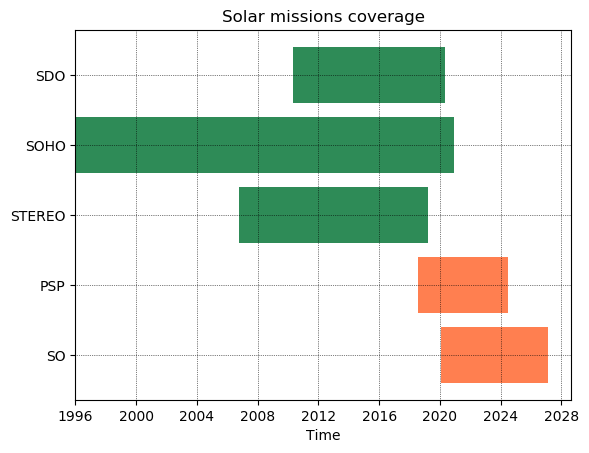

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

plt.rcdefaults()
fig, ax = plt.subplots()

missions = ('SDO', 'SOHO', 'STEREO', 'PSP', 'SO')
y_pos = range(len(missions))

date_beg = [dt.date(2010, 5, 1),
            dt.date(1996, 1, 1),
            dt.date(2006, 10, 1),
            dt.date(2018, 8, 1),
            dt.date(2020, 2, 1)
           ]
date_end = [dt.date(2020, 5, 1),
            dt.date(2020, 12, 1),
            dt.date(2019, 4, 1),
            dt.date(2024, 7, 1),
            dt.date(2027, 2, 1)
           ]
colors = ['seagreen', 'seagreen', 'seagreen', 'coral', 'coral']

date_beg, date_end = [mdates.date2num(item) for item in (date_beg, date_end)]
ax.barh(y_pos, date_end-date_beg, left=date_beg, align='center', color=colors, ecolor='black')

ax.set_yticks(y_pos)
ax.set_yticklabels(missions)
ax.invert_yaxis()
ax.xaxis_date()
ax.grid(linestyle=':', linewidth='0.5', color='black')
ax.axis('tight')
ax.set_xlabel('Time')
ax.set_title('Solar missions coverage')

plt.show()

# The new missions: PSP & SO

Parker Solar Probe (PSP) and Solar Orbiter (SO) are the most recently launched missions that will study the Sun from two perspectives never explored before:

- PSP will approach the Sun as never before (less than 10 solar radii)
- SO will observe the Sun in an inclined orbite, giving access to the higher latitudes of the star

<img src="https://cdn.mos.cms.futurecdn.net/BtQv65Ax6SFYw7vTjsZVw3-1024-80.jpg"/>

# The Halloween event

In the months of October-November 2003 a series of energetic events were observed in the Sun. Between the 28th and the 29th of October, extremely strong flares and CMEs were detected in the Sun. All the events had an strong effect on the Earth environment. These storms are known as the [Halloween Solar Storms](https://en.wikipedia.org/wiki/Halloween_solar_storms,_2003).

Satellite-based systems and communications were affected, aircraft were advised to avoid high altitudes near the polar regions, and a one-hour-long power outage occurred in Sweden as a result of the solar activity. Aurorae were observed at latitudes as far south as Texas and the Mediterranean countries of Europe. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Aurora_dmsp.jpg/440px-Aurora_dmsp.jpg"/>

The following commands will download GOES data. Be patient, the download can take up to a minute!

In [5]:
%matplotlib inline
import sunpy.timeseries
from sunpy.net import Fido, attrs as a
goes = Fido.search(a.Time("2003/10/01", "2003/11/20"), a.Instrument("XRS"))

goes_files = Fido.fetch(goes)

Files Downloaded:   0%|          | 0/51 [00:00<?, ?file/s]

go1220031002.fits:   0%|          | 0.00/821k [00:00<?, ?B/s]




go1220031005.fits:   0%|          | 0.00/821k [00:00<?, ?B/s]



go1220031004.fits:   0%|          | 0.00/821k [00:00<?, ?B/s]
go1220031001.fits:   0%|          | 0.00/821k [00:00<?, ?B/s]


go1220031003.fits:   0%|          | 0.00/821k [00:00<?, ?B/s]

go1220031002.fits:   2%|▏         | 16.5k/821k [00:00<00:05, 158kB/s]



go1220031004.fits:   0%|          | 100/821k [00:00<13:51, 987B/s]
go1220031001.fits:   2%|▏         | 16.5k/821k [00:00<00:05, 160kB/s]


go1220031003.fits:   0%|          | 100/821k [00:00<15:03, 908B/s]

go1220031002.fits:   8%|▊         | 65.7k/821k [00:00<00:03, 199kB/s]




go1220031005.fits:   4%|▍         | 32.9k/821k [00:00<00:04, 163kB/s]



go1220031004.fits:   4%|▍         | 32.9k/821k [00:00<09:19, 1.41kB/s]
go1220031001.fits:   6%|▌         | 49.3k/821k [00:00<00:04, 186kB/s]


go1220031003.fits:   4%|▍         | 32.9k/821k [00

go1220031010.fits:  46%|████▌     | 377k/821k [00:00<00:01, 388kB/s]




go1220031009.fits:  58%|█████▊    | 476k/821k [00:00<00:21, 15.8kB/s]

go1220031008.fits:  82%|████████▏ | 672k/821k [00:01<00:00, 629kB/s]
go1220031010.fits:  56%|█████▌    | 459k/821k [00:00<00:00, 457kB/s]



go1220031011.fits:   0%|          | 0.00/821k [00:00<?, ?B/s]




go1220031009.fits:  67%|██████▋   | 551k/821k [00:01<00:12, 22.3kB/s]

go1220031008.fits:  92%|█████████▏| 754k/821k [00:01<00:00, 666kB/s]
go1220031010.fits:  64%|██████▍   | 528k/821k [00:00<00:00, 509kB/s]

Files Downloaded:  16%|█▌        | 8/51 [00:03<00:23,  1.84file/s]  


go1220031012.fits:   0%|          | 0.00/821k [00:00<?, ?B/s]




go1220031009.fits:  76%|███████▌  | 623k/821k [00:01<00:06, 31.5kB/s]
go1220031010.fits:  74%|███████▍  | 607k/821k [00:01<00:00, 566kB/s]



go1220031011.fits:   4%|▍         | 32.9k/821k [00:00<00:04, 166kB/s]




go1220031009.fits:  86%|████████▌ | 705k/821k [00:01<00:02, 44.2kB/s]
go1220031010.fit

go1220031016.fits:  68%|██████▊   | 558k/821k [00:00<00:24, 10.9kB/s]




go1220031019.fits:   0%|          | 0.00/821k [00:00<?, ?B/s]


go1220031017.fits:  69%|██████▉   | 565k/821k [00:00<00:00, 551kB/s]

go1220031018.fits:  46%|████▌     | 377k/821k [00:00<00:00, 445kB/s]



go1220031016.fits:  80%|███████▉  | 656k/821k [00:00<00:10, 15.5kB/s]




go1220031019.fits:   2%|▏         | 16.5k/821k [00:00<00:04, 165kB/s]


go1220031017.fits:  78%|███████▊  | 640k/821k [00:01<00:00, 598kB/s]



go1220031016.fits:  94%|█████████▍| 771k/821k [00:01<00:02, 22.0kB/s]
go1220031020.fits:   0%|          | 0.00/821k [00:00<?, ?B/s]




go1220031019.fits:   5%|▌         | 41.4k/821k [00:00<00:04, 183kB/s]


go1220031017.fits:  90%|████████▉ | 738k/821k [00:01<00:00, 672kB/s]

go1220031018.fits:  58%|█████▊    | 476k/821k [00:00<00:00, 467kB/s]



Files Downloaded:  31%|███▏      | 16/51 [00:06<00:14,  2.50file/s]  




go1220031019.fits:  12%|█▏        | 98.5k/821k [00:00<00:03, 230kB/s]


      

go1220031025.fits:  24%|██▍       | 197k/821k [00:00<00:02, 303kB/s]


go1220031027.fits:  20%|█▉        | 164k/821k [00:00<00:02, 262kB/s]



go1220031026.fits:  20%|█▉        | 164k/821k [00:00<00:03, 178kB/s] 




go1220031024.fits:  54%|█████▍    | 443k/821k [00:00<00:00, 404kB/s]
go1220031025.fits:  32%|███▏      | 262k/821k [00:00<00:01, 360kB/s]


go1220031027.fits:  32%|███▏      | 259k/821k [00:00<00:01, 335kB/s]



go1220031026.fits:  30%|██▉       | 246k/821k [00:00<00:02, 233kB/s]

go1220031028.fits:   4%|▍         | 32.9k/821k [00:00<00:04, 161kB/s]




go1220031024.fits:  63%|██████▎   | 521k/821k [00:00<00:00, 472kB/s]
go1220031025.fits:  38%|███▊      | 312k/821k [00:00<00:01, 386kB/s]


go1220031027.fits:  42%|████▏     | 344k/821k [00:00<00:01, 407kB/s]



go1220031026.fits:  40%|███▉      | 328k/821k [00:00<00:01, 295kB/s]

go1220031028.fits:  10%|█         | 82.1k/821k [00:00<00:03, 201kB/s]




go1220031024.fits:  72%|███████▏  | 590k/821k [00:01<00:00, 510kB/s]




go1220031102.fits:  24%|██▍       | 197k/821k [00:00<04:17, 2.43kB/s]


go1220031030.fits:  95%|█████████▌| 782k/821k [00:01<00:00, 568kB/s]


Files Downloaded:  61%|██████    | 31/51 [00:11<00:08,  2.49file/s] 
go1220031101.fits:  62%|██████▏   | 508k/821k [00:01<00:00, 423kB/s]

go1220031102.fits:  32%|███▏      | 262k/821k [00:00<02:41, 3.46kB/s]

go1220031102.fits:  40%|███▉      | 328k/821k [00:00<01:39, 4.93kB/s]
go1220031101.fits:  70%|██████▉   | 574k/821k [00:01<00:00, 416kB/s]

go1220031102.fits:  48%|████▊     | 394k/821k [00:00<01:00, 7.02kB/s]



go1220031103.fits:   0%|          | 0.00/821k [00:00<?, ?B/s]
go1220031101.fits:  78%|███████▊  | 640k/821k [00:01<00:00, 463kB/s]




go1220031104.fits:   0%|          | 0.00/821k [00:00<?, ?B/s]

go1220031102.fits:  56%|█████▌    | 459k/821k [00:00<00:36, 9.98kB/s]



go1220031103.fits:   3%|▎         | 22.1k/821k [00:00<00:03, 221kB/s]
go1220031101.fits:  84%|████████▍ | 689k/821k [00:01<00:00, 471kB/s]




go1220031104.fits:  

go1220031110.fits:  20%|█▉        | 164k/821k [00:00<03:50, 2.84kB/s] 

go1220031107.fits:  96%|█████████▌| 787k/821k [00:01<00:00, 635kB/s]



go1220031108.fits:  32%|███▏      | 262k/821k [00:00<00:01, 352kB/s]




go1220031109.fits:  30%|██▉       | 246k/821k [00:00<00:02, 269kB/s]

                                                                    


go1220031110.fits:  27%|██▋       | 221k/821k [00:00<02:27, 4.06kB/s]



go1220031108.fits:  40%|███▉      | 328k/821k [00:00<00:01, 399kB/s]


go1220031110.fits:  34%|███▍      | 279k/821k [00:00<01:33, 5.78kB/s]




go1220031109.fits:  40%|███▉      | 328k/821k [00:00<00:01, 305kB/s]



go1220031108.fits:  48%|████▊     | 394k/821k [00:00<00:00, 444kB/s]


go1220031110.fits:  42%|████▏     | 344k/821k [00:00<00:57, 8.22kB/s]




go1220031109.fits:  50%|████▉     | 410k/821k [00:00<00:01, 373kB/s]



go1220031108.fits:  56%|█████▌    | 459k/821k [00:00<00:00, 485kB/s]
go1220031111.fits:   0%|          | 0.00/821k [00:00<?, ?B/s]


go

go1220031113.fits:  76%|███████▌  | 623k/821k [00:01<00:03, 59.8kB/s]
go1220031116.fits:  25%|██▌       | 205k/821k [00:00<00:01, 314kB/s]



go1220031114.fits:  68%|██████▊   | 558k/821k [00:01<00:00, 463kB/s]


go1220031115.fits:  90%|████████▉ | 738k/821k [00:01<00:00, 615kB/s]

go1220031117.fits:  18%|█▊        | 148k/821k [00:00<03:52, 2.89kB/s] 




go1220031113.fits:  82%|████████▏ | 672k/821k [00:01<00:01, 80.6kB/s]
go1220031116.fits:  30%|██▉       | 246k/821k [00:00<00:01, 328kB/s]



go1220031114.fits:  74%|███████▎  | 605k/821k [00:01<00:00, 454kB/s]


go1220031115.fits:  98%|█████████▊| 805k/821k [00:01<00:00, 627kB/s]


Files Downloaded:  86%|████████▋ | 44/51 [00:16<00:03,  2.05file/s] 

go1220031117.fits:  26%|██▌       | 213k/821k [00:00<02:27, 4.12kB/s]
go1220031116.fits:  40%|███▉      | 328k/821k [00:00<00:01, 399kB/s]




go1220031113.fits:  90%|████████▉ | 738k/821k [00:01<00:00, 109kB/s] 



go1220031114.fits:  79%|███████▉  | 651k/821k [00:01<00:00, 446kB/s]

go

The next command will stitch toguether the files downloaded above:

In [7]:
combined_goes_ts = sunpy.timeseries.TimeSeries(goes_files, source='XRS', concatenate=True)

And the next line will plot the data (be patient, there is a lot of data to plot! And some warnings may appear):

/home/amaya/.conda/envs/spaceweather/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amaya/.conda/envs/spaceweather/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amaya/.conda/envs/spaceweather/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amaya/.conda/envs/spaceweather/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amaya/.conda/envs/spaceweather/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWar

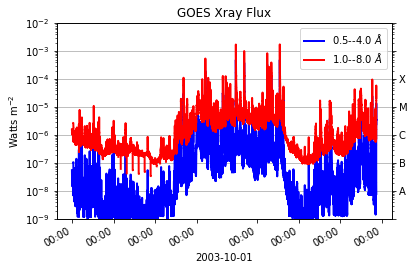

In [12]:
fig = combined_goes_ts.peek()

The figure above was plotted using the **SunPy** python package.

<div class="alert alert-block alert-info">
<b>Questions:</b>
 <ol type="a">
  <li>How are solar flares classified?</li>
  <li>What is the GOES satelite?</li>
  <li>What is the XRS instrument?</li>
  <li>Who operates this satellite?</li>
  <li>What is its orbit?</li>
</ol> 
</div>

SunPy was developed by the solar physics community as a response to the difficulties of using the language IDL commonly used in this domain. If you want to work in solar physics you will probably have to work with SolarSoft, which was written in IDL... and I'm sorry for that! IDL is propietary, SolarSoft has thousands of lines of code, is not version controled and has duplicated code. It is a bit of a nightmare.

SunPy is much simpler of use, and gives quick access to solar data from multiple repositories and from multiple space missions.

For the moment, please concentrate on the high number of X-class flares observed in the time interval plotted.

New lets go the the [Helioviewer webpage](http://helioviewer.org) to observe what happened in the Sun in those days:

- Observe the Sun in multiple wavelenghts using the EIT instrument from SOHO. Check in particular the active regions.
- Observe the magnetic activity of the Sun at this time, using the MDI instrument of SOHO.
- Add one layer with the LASCO C2 coronagraph of the SOHO mission.
- Add one additional layer with the LASCO C3 coronagraph of SOHO.
- Produce a video of the event to share with your friends and family (this might take a few minutes).

<div class="alert alert-block alert-info">
<b>Questions:</b>
 <ol type="a">
  <li>Can you find the date and time of the strongest flare/CME for the halloween event?</li>
  <li>Can you see the emergence of plasma from the Sun?</li>
  <li>What effects has the storm on the satellite instrumentation? Why?</li>
  <li>What is the bright dot on the top left of the images?</li>
</ol> 
</div>

# The HEK database

The Heliophysics Events Knowledgebase (HEK) is a database of solar events that could be of interest to researchers. It includes information about flares, active regions, CME, filaments, and many many other features.

Thanks to the HEK, a researcher does not need to manually detect regions of interest by him/her-self. The HEK database process solar events and keeps a record of interesting features, including a bounding box around the event that can be used to extract images of the region using a visulization tool like SunPy.

More information about the Heliophysics Events Knowledgebase (HEK) can be found in the [project's web page](https://www.lmsal.com/hek/index.html).

A detailed paper about the HEK database can be found in [this link](https://link.springer.com/content/pdf/10.1007%2F978-1-4614-3673-7_5.pdf).

The Helioviewer website also allows to see the active regions, flares, CME and other information during the Halloween solar storm using the HEK database:

* Take note of the NOAA active region numbers detected during the Halloween storm.
* Find the possition of the bounding box for this AR.
* Write down the Mount Wilson classification for this AR.

<div class="alert alert-block alert-info">
<b>Questions:</b>
 <ol type="a">
  <li>What is the Mount Wilson Magnetic Classification?</li>
  <li>What is the McIntosh class, and does it correspond to?</li>
  <li>Can you find an AR in previous days whith a different classification?</li>
</ol> 
</div>

Active Region classification can become complex and is performed manually by space weather forecasters. Bellow you can find a summary of the 3 component McIntosh classification. It is also know as the 'Zpc', where 'Z' is the modified Zurich Class, 'p' describes the penumbra of the principal spot, and 'c' describes the distribution of spots in the interior of the group.

These classifications can get [very complex](http://www.cv-helios.net/cvzmval.html)! But they have [precisse definitions](http://sidc.oma.be/educational/classification.php).

<img src="https://www.spaceweatherlive.com/images/help/zonnevlekken_malde/zonnevlekclassificatie.jpg" alt="Alt text that describes the graphic" title="Title text" />

<div class="alert alert-block alert-warning">
<b>Exercise:</b> Use the SDO satellite to observe the Sun on 2019/03/06 21:00:00. Look what happens for the follwoing 5 hours. Can you explain this incredible fenomena? Can you see the same effect in the SOHO LASCO Coronagraphs? Why?
</div>

# The JSOC service

Data from the SDO satellite is gathered and processed using a complex data pipeline. Processed data is available initially at the [Joint Science Operations Center](http://jsoc.stanford.edu/) (JSOC).

<img src="https://media.nature.com/lw926/nature-assets/sdata/2017/sdata201796/images_hires/sdata201796-f1.jpg" alt="Alt text that describes the graphic" title="Title text" />

To be able to download the final data you need to register your email at the [JSOC email registration website](http://jsoc.stanford.edu/ajax/register_email.html).

Keep an eye on yor emails for the registration confirmation. It will arrive in the next minutes!

Remember to enter your email in the next line:

In [13]:
myemail = "xxxx"

Now you can proceede to search the files that you want to download:

In [14]:
from sunpy.net import Fido, attrs as a
import astropy.units as u

res = Fido.search(a.Time('2014-01-01T00:00:00', '2014-01-01T00:01:00'),
                  a.jsoc.Notify(myemail),
                  a.jsoc.Series('aia.lev1_euv_12s'),
                  a.jsoc.Wavelength(131*u.AA)
                 )
print(res)

Results from 1 Provider:

6 Results from the JSOCClient:
       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
       str20           str7     str5    int64    int64 
-------------------- -------- -------- -------- -------
2014-01-01T00:00:01Z  SDO/AIA    AIA_1      131    2145
2014-01-01T00:00:13Z  SDO/AIA    AIA_1      131    2145
2014-01-01T00:00:25Z  SDO/AIA    AIA_1      131    2145
2014-01-01T00:00:37Z  SDO/AIA    AIA_1      131    2145
2014-01-01T00:00:49Z  SDO/AIA    AIA_1      131    2145
2014-01-01T00:01:01Z  SDO/AIA    AIA_1      131    2145




Now we can request to download the full image data, in FITS format. This step might take a few minutes, until the request above is fullfilled by the remote system.

<div class="alert alert-block alert-danger">
<b>WARNING:</b> Be patient! Each file can be up to 10MB big and we are using a very baf WiFi hotspot!
</div>

In [15]:
downloaded_files = Fido.fetch(res)

Export request pending. [id="JSOC_20200319_2693", status=2]
Waiting for 0 seconds...


Files Downloaded:   0%|          | 0/12 [00:00<?, ?file/s]

12 URLs found for download. Full request totalling 51MB



aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:   0%|          | 0.00/8.80M [00:00<?, ?B/s]

aia.lev1_euv_12s.2014-01-01T000010Z.131.spikes.fits:   0%|          | 0.00/54.7k [00:00<?, ?B/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:   0%|          | 0.00/8.80M [00:00<?, ?B/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:   0%|          | 0.00/8.80M [00:00<?, ?B/s]



aia.lev1_euv_12s.2014-01-01T000022Z.131.spikes.fits:   0%|          | 0.00/54.7k [00:00<?, ?B/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:   0%|          | 4.20k/8.80M [00:00<13:51, 10.6kB/s]

aia.lev1_euv_12s.2014-01-01T000010Z.131.spikes.fits:   8%|▊         | 4.20k/54.7k [00:00<00:04, 10.5kB/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:   0%|          | 4.20k/8.80M [00:00<14:02, 10.4kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:   0%|          | 4.20k/8.80M [00:00<14:15, 10.3kB/s]



aia.lev1_euv_12s.2014-01-01T000022Z.131.spikes

aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:   5%|▍         | 436k/8.80M [00:04<01:06, 126kB/s] 
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:   5%|▍         | 433k/8.80M [00:05<01:33, 89.1kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:   2%|▏         | 170k/8.80M [00:05<11:36, 12.4kB/s]

aia.lev1_euv_12s.2014-01-01T000034Z.131.spikes.fits:  83%|████████▎ | 45.3k/54.7k [00:03<00:00, 12.0kB/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:   6%|▌         | 501k/8.80M [00:05<01:02, 133kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:   5%|▌         | 473k/8.80M [00:05<01:31, 90.7kB/s]

aia.lev1_euv_12s.2014-01-01T000034Z.131.spikes.fits:  90%|█████████ | 49.3k/54.7k [00:03<00:00, 11.1kB/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:   7%|▋         | 608k/8.80M [00:05<00:52, 156kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:   5%|▌         | 484k/8.80M [00:05<02:43, 51.0kB/s]

aia.lev1_euv_12s

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:   0%|          | 43.9k/8.80M [00:02<14:45, 9.89kB/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:  18%|█▊        | 1.58M/8.80M [00:11<00:49, 146kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:   1%|          | 46.3k/8.80M [00:03<17:32, 8.32kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:   3%|▎         | 252k/8.80M [00:11<08:20, 17.1kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:   1%|          | 50.7k/8.80M [00:03<16:18, 8.95kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:   3%|▎         | 259k/8.80M [00:11<08:15, 17.3kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:   8%|▊         | 742k/8.80M [00:11<12:00, 11.2kB/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:  18%|█▊        | 1.60M/8.80M [00:11<01:43, 69.4kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:   1%|          | 56.5k/8.80M [00:03<13:10, 11.1kB/s]

aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:   9%|▉         | 822k/8.80M [00:15<04:12, 31.6kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:   4%|▍         | 388k/8.80M [00:15<02:54, 48.1kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:   2%|▏         | 189k/8.80M [00:07<02:48, 51.0kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:   1%|          | 78.5k/8.80M [00:13<10:55, 13.3kB/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:  22%|██▏       | 1.98M/8.80M [00:15<00:40, 171kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:   9%|▉         | 831k/8.80M [00:15<03:39, 36.4kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:   5%|▍         | 400k/8.80M [00:15<02:35, 54.0kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:   2%|▏         | 200k/8.80M [00:07<02:32, 56.5kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:   1%|          | 85.8k/8.80M [00:13<10:02, 14.5kB/s]

aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:   2%|▏         | 172k/8.80M [00:16<04:07, 34.9kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:   7%|▋         | 575k/8.80M [00:18<01:35, 85.8kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:   4%|▍         | 368k/8.80M [00:09<01:46, 78.9kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  10%|█         | 915k/8.80M [00:18<05:14, 25.1kB/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:  31%|███       | 2.74M/8.80M [00:18<00:17, 355kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:   2%|▏         | 178k/8.80M [00:16<04:01, 35.6kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:   7%|▋         | 591k/8.80M [00:18<01:31, 89.5kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:   4%|▍         | 383k/8.80M [00:10<01:41, 82.6kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  10%|█         | 921k/8.80M [00:18<04:44, 27.7kB/s]


ai

aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:  36%|███▋      | 3.21M/8.80M [00:21<00:31, 177kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:   7%|▋         | 592k/8.80M [00:13<02:01, 67.5kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  12%|█▏        | 1.02M/8.80M [00:21<03:40, 35.3kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:   9%|▉         | 801k/8.80M [00:21<02:05, 63.7kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:   3%|▎         | 289k/8.80M [00:19<03:56, 36.1kB/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:  37%|███▋      | 3.28M/8.80M [00:21<00:25, 217kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:   7%|▋         | 610k/8.80M [00:13<01:47, 76.2kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  12%|█▏        | 1.03M/8.80M [00:22<03:10, 40.8kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:   9%|▉         | 818k/8.80M [00:22<01:49, 73.0kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  12%|█▏        | 1.05M/8.80M [00:24<01:05, 119kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:   9%|▉         | 793k/8.80M [00:16<02:14, 59.7kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:   5%|▌         | 447k/8.80M [00:22<01:56, 71.6kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  14%|█▎        | 1.20M/8.80M [00:24<01:37, 78.2kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  12%|█▏        | 1.07M/8.80M [00:24<01:06, 117kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:   9%|▉         | 803k/8.80M [00:16<02:10, 61.2kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:   5%|▌         | 460k/8.80M [00:22<01:51, 75.1kB/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:  44%|████▍     | 3.89M/8.80M [00:24<00:38, 129kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  14%|█▍        | 1.21M/8.80M [00:24<01:34, 80.5kB/s]





aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  16%|█▌        | 1.40M/8.80M [00:26<01:10, 105kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  17%|█▋        | 1.49M/8.80M [00:26<00:30, 242kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  11%|█         | 970k/8.80M [00:18<01:31, 85.4kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:   8%|▊         | 663k/8.80M [00:24<01:23, 96.9kB/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:  51%|█████     | 4.50M/8.80M [00:26<00:11, 359kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  16%|█▌        | 1.42M/8.80M [00:26<01:09, 107kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  17%|█▋        | 1.53M/8.80M [00:26<00:29, 245kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  11%|█         | 984k/8.80M [00:18<01:30, 86.5kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:   8%|▊         | 682k/8.80M [00:24<01:19, 102kB/s] 



aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  19%|█▉        | 1.66M/8.80M [00:28<00:56, 126kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  13%|█▎        | 1.11M/8.80M [00:20<03:22, 38.0kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  27%|██▋       | 2.37M/8.80M [00:28<00:14, 434kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  10%|▉         | 854k/8.80M [00:26<02:21, 56.0kB/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:  62%|██████▏   | 5.44M/8.80M [00:28<00:08, 412kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  19%|█▉        | 1.68M/8.80M [00:28<00:55, 128kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  13%|█▎        | 1.12M/8.80M [00:20<03:21, 38.1kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  28%|██▊       | 2.43M/8.80M [00:28<00:14, 431kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  10%|▉         | 861k/8.80M [00:26<02:30, 52.7kB/s]

aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:  71%|███████▏  | 6.28M/8.80M [00:30<00:06, 410kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  23%|██▎       | 2.04M/8.80M [00:30<00:35, 191kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  14%|█▍        | 1.24M/8.80M [00:22<01:47, 70.4kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  39%|███▉      | 3.43M/8.80M [00:30<00:17, 306kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  11%|█▏        | 991k/8.80M [00:28<01:49, 71.0kB/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:  72%|███████▏  | 6.35M/8.80M [00:30<00:05, 410kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  24%|██▎       | 2.07M/8.80M [00:30<00:33, 199kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  14%|█▍        | 1.25M/8.80M [00:22<01:43, 72.6kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  39%|███▉      | 3.46M/8.80M [00:31<00:18, 283kB/s]




aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  26%|██▌       | 2.28M/8.80M [00:33<00:53, 122kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  16%|█▋        | 1.44M/8.80M [00:24<01:18, 93.2kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  49%|████▊     | 4.29M/8.80M [00:33<00:11, 406kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  14%|█▍        | 1.23M/8.80M [00:31<01:06, 114kB/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:  78%|███████▊  | 6.91M/8.80M [00:33<00:07, 266kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  26%|██▋       | 2.32M/8.80M [00:33<00:46, 138kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  17%|█▋        | 1.46M/8.80M [00:25<01:15, 97.6kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  14%|█▍        | 1.25M/8.80M [00:31<01:03, 119kB/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:  79%|███████▉  | 6.96M/8.80M [00:33<00:06, 292kB/s]
a

aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  53%|█████▎    | 4.68M/8.80M [00:35<00:18, 226kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  19%|█▉        | 1.70M/8.80M [00:27<00:57, 125kB/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:  87%|████████▋ | 7.64M/8.80M [00:35<00:03, 313kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  18%|█▊        | 1.56M/8.80M [00:33<00:39, 182kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  31%|███▏      | 2.76M/8.80M [00:35<00:29, 203kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  54%|█████▍    | 4.74M/8.80M [00:35<00:15, 257kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  20%|█▉        | 1.72M/8.80M [00:27<00:56, 125kB/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:  87%|████████▋ | 7.70M/8.80M [00:35<00:03, 328kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  18%|█▊        | 1.60M/8.80M [00:33<00:37, 194kB/s]
aia

aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  24%|██▍       | 2.16M/8.80M [00:35<00:19, 338kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  36%|███▌      | 3.18M/8.80M [00:37<00:27, 204kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  62%|██████▏   | 5.48M/8.80M [00:37<00:09, 344kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  23%|██▎       | 2.04M/8.80M [00:29<00:40, 168kB/s]


aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits:  95%|█████████▍| 8.35M/8.80M [00:37<00:01, 306kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  36%|███▋      | 3.20M/8.80M [00:37<00:29, 189kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  25%|██▌       | 2.22M/8.80M [00:35<00:18, 347kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  63%|██████▎   | 5.54M/8.80M [00:37<00:09, 358kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  24%|██▎       | 2.07M/8.80M [00:29<00:38, 177kB/s]


ai

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  29%|██▉       | 2.55M/8.80M [00:31<00:22, 274kB/s]


aia.lev1_euv_12s.2014-01-01T000058Z.131.spikes.fits:  34%|███▍      | 18.8k/54.7k [00:00<00:01, 35.3kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  41%|████      | 3.62M/8.80M [00:39<00:27, 191kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  39%|███▊      | 3.40M/8.80M [00:37<00:08, 666kB/s]


aia.lev1_euv_12s.2014-01-01T000058Z.131.spikes.fits:  56%|█████▌    | 30.4k/54.7k [00:00<00:00, 41.9kB/s]


                                                                                                         

Files Downloaded:  50%|█████     | 6/12 [00:40<00:46,  7.82s/file]      | 2.60M/8.80M [00:31<00:22, 278kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  39%|███▉      | 3.47M/8.80M [00:37<00:07, 671kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  42%|████▏     | 3.65M/8.80M [00:39<00:26, 197kB/s]




aia.lev1_eu

aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  48%|████▊     | 4.24M/8.80M [00:40<00:22, 207kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  78%|███████▊  | 6.83M/8.80M [00:42<00:06, 286kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:   4%|▍         | 347k/8.80M [00:02<00:45, 188kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  43%|████▎     | 3.82M/8.80M [00:42<00:54, 91.1kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  42%|████▏     | 3.66M/8.80M [00:33<00:16, 305kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  78%|███████▊  | 6.88M/8.80M [00:42<00:06, 298kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  44%|████▎     | 3.85M/8.80M [00:42<00:47, 103kB/s] 



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  48%|████▊     | 4.27M/8.80M [00:40<00:25, 179kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:   4%|▍         | 370k/8.80M [00:02<00:55, 153kB/s]





aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  55%|█████▌    | 4.85M/8.80M [00:42<00:12, 327kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  85%|████████▌ | 7.49M/8.80M [00:44<00:04, 291kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  48%|████▊     | 4.26M/8.80M [00:36<00:12, 370kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  10%|▉         | 854k/8.80M [00:04<00:30, 258kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  49%|████▊     | 4.29M/8.80M [00:44<00:18, 241kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  56%|█████▌    | 4.90M/8.80M [00:42<00:11, 333kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  86%|████████▌ | 7.54M/8.80M [00:44<00:04, 302kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  49%|████▉     | 4.31M/8.80M [00:36<00:12, 353kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  10%|█         | 901k/8.80M [00:04<00:29, 269kB/s]
aia.

aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  16%|█▌        | 1.42M/8.80M [00:06<00:26, 279kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  57%|█████▋    | 5.04M/8.80M [00:46<00:09, 389kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  63%|██████▎   | 5.54M/8.80M [00:44<00:09, 327kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  92%|█████████▏| 8.13M/8.80M [00:46<00:02, 302kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  59%|█████▉    | 5.17M/8.80M [00:38<00:08, 417kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  17%|█▋        | 1.47M/8.80M [00:06<00:25, 286kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  58%|█████▊    | 5.12M/8.80M [00:46<00:09, 409kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  64%|██████▎   | 5.60M/8.80M [00:44<00:09, 338kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  93%|█████████▎| 8.18M/8.80M [00:46<00:02, 294kB/s]

a

aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  69%|██████▊   | 6.05M/8.80M [00:48<00:56, 48.5kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  65%|██████▍   | 5.68M/8.80M [00:42<01:01, 50.6kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  98%|█████████▊| 8.61M/8.80M [00:50<00:02, 86.8kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  66%|██████▌   | 5.79M/8.80M [00:50<00:27, 108kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  65%|██████▍   | 5.69M/8.80M [00:42<01:22, 37.8kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  21%|██▏       | 1.88M/8.80M [00:10<01:59, 58.0kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  66%|██████▋   | 5.83M/8.80M [00:51<00:27, 109kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  65%|██████▍   | 5.70M/8.80M [00:43<01:30, 34.1kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  69%|██████▉   | 6.06M/8.80M [00:49<01:28, 30.9kB/s]


aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  99%|█████████▉| 8.72M/8.80M [00:55<00:03, 22.6kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  67%|██████▋   | 5.94M/8.80M [00:47<00:30, 94.1kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  71%|███████   | 6.22M/8.80M [00:53<00:46, 55.9kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  25%|██▍       | 2.20M/8.80M [00:15<03:53, 28.2kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  75%|███████▌  | 6.62M/8.80M [00:55<00:08, 254kB/s]




aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits:  99%|█████████▉| 8.73M/8.80M [00:55<00:02, 25.7kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  68%|██████▊   | 5.97M/8.80M [00:47<00:26, 108kB/s] 



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  71%|███████   | 6.24M/8.80M [00:53<00:37, 67.5kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  25%|██▌       | 2.20M/8.80M [00:15<03:39, 30.0k

aia.lev1_euv_12s.2014-01-01T000110Z.131.spikes.fits:  21%|██        | 11.6k/54.7k [00:00<00:01, 32.3kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  71%|███████▏  | 6.29M/8.80M [00:49<00:15, 158kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  74%|███████▍  | 6.51M/8.80M [00:55<00:17, 133kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  29%|██▉       | 2.58M/8.80M [00:17<00:27, 229kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  82%|████████▏ | 7.18M/8.80M [00:57<00:04, 341kB/s]




aia.lev1_euv_12s.2014-01-01T000110Z.131.spikes.fits:  46%|████▌     | 24.9k/54.7k [00:00<00:00, 39.9kB/s]




Files Downloaded:  67%|██████▋   | 8/12 [00:58<00:30,  7.68s/file]                                       

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  72%|███████▏  | 6.32M/8.80M [00:49<00:15, 162kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  74%|███████▍  | 6.53M/8.80M [00:55<00:16, 134kB/s]


aia.lev1

aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  90%|█████████ | 7.96M/8.80M [01:00<00:04, 190kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  32%|███▏      | 2.82M/8.80M [00:20<01:39, 60.0kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  77%|███████▋  | 6.79M/8.80M [00:52<00:12, 158kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  79%|███████▊  | 6.92M/8.80M [00:58<00:13, 139kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  91%|█████████ | 7.99M/8.80M [01:00<00:04, 190kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  32%|███▏      | 2.83M/8.80M [00:20<01:36, 61.9kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  77%|███████▋  | 6.81M/8.80M [00:52<00:12, 164kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  79%|███████▉  | 6.94M/8.80M [00:58<00:14, 131kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  91%|█████████▏| 8.03M/8.80M [01:00<00:03, 206kB/s]


aia

aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  82%|████████▏ | 7.21M/8.80M [01:03<00:24, 63.9kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  96%|█████████▋| 8.49M/8.80M [01:05<00:02, 126kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  34%|███▍      | 3.01M/8.80M [00:25<02:26, 39.4kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  82%|████████▏ | 7.20M/8.80M [00:56<00:15, 102kB/s] 



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  82%|████████▏ | 7.23M/8.80M [01:03<00:21, 74.5kB/s]
aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits:  97%|█████████▋| 8.53M/8.80M [01:05<00:02, 125kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  34%|███▍      | 3.03M/8.80M [00:25<02:30, 38.3kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  82%|████████▏ | 7.23M/8.80M [00:57<00:16, 96.9kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  82%|████████▏ | 7.25M/8.80M [01:03<00:22, 67.9kB/s]


aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  88%|████████▊ | 7.75M/8.80M [01:03<00:12, 86.4kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  38%|███▊      | 3.33M/8.80M [00:31<01:49, 50.1kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  88%|████████▊ | 7.77M/8.80M [01:03<00:13, 78.1kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  87%|████████▋ | 7.61M/8.80M [01:09<01:04, 18.3kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  38%|███▊      | 3.35M/8.80M [00:31<01:54, 47.5kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  89%|████████▊ | 7.81M/8.80M [01:03<00:12, 78.0kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  87%|████████▋ | 7.62M/8.80M [01:09<01:12, 16.2kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  38%|███▊      | 3.36M/8.80M [00:32<01:58, 45.9kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  89%|████████▉ | 7.84M/8.80M [01:04<00:12, 77.7k

aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  43%|████▎     | 3.76M/8.80M [00:38<01:00, 83.8kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  96%|█████████▌| 8.44M/8.80M [01:10<00:03, 107kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  88%|████████▊ | 7.76M/8.80M [01:16<00:32, 31.6kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  43%|████▎     | 3.79M/8.80M [00:38<00:52, 95.5kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  96%|█████████▌| 8.47M/8.80M [01:10<00:02, 118kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  88%|████████▊ | 7.78M/8.80M [01:16<00:29, 35.3kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  43%|████▎     | 3.83M/8.80M [00:39<00:55, 89.3kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  88%|████████▊ | 7.78M/8.80M [01:17<00:37, 27.2kB/s]

aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits:  97%|█████████▋| 8.50M/8.80M [01:11<00:02, 101kB/

aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  55%|█████▍    | 4.84M/8.80M [00:46<00:20, 191kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  91%|█████████ | 8.03M/8.80M [01:24<00:18, 40.9kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  56%|█████▌    | 4.89M/8.80M [00:46<00:22, 173kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  91%|█████████▏| 8.04M/8.80M [01:24<00:20, 37.7kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  56%|█████▋    | 4.97M/8.80M [00:46<00:18, 210kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  92%|█████████▏| 8.05M/8.80M [01:24<00:16, 44.5kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  57%|█████▋    | 5.03M/8.80M [00:47<00:18, 203kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  92%|█████████▏| 8.07M/8.80M [01:25<00:16, 43.5kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  58%|█████▊    | 5.10M/8.80M [00:47<00:19, 187k

aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  62%|██████▏   | 5.45M/8.80M [00:56<01:13, 45.7kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  98%|█████████▊| 8.61M/8.80M [01:34<00:03, 62.1kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  62%|██████▏   | 5.47M/8.80M [00:56<01:19, 42.1kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  98%|█████████▊| 8.63M/8.80M [01:34<00:03, 56.1kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  62%|██████▏   | 5.48M/8.80M [00:56<01:06, 49.9kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  98%|█████████▊| 8.65M/8.80M [01:34<00:02, 65.2kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  62%|██████▏   | 5.50M/8.80M [00:56<00:56, 58.3kB/s]



aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits:  98%|█████████▊| 8.67M/8.80M [01:35<00:01, 75.6kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  63%|██████▎   | 5.51M/8.80M [00:57<01:02, 

aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  80%|████████  | 7.04M/8.80M [01:14<00:10, 169kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  81%|████████  | 7.11M/8.80M [01:15<00:09, 174kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  82%|████████▏ | 7.17M/8.80M [01:15<00:09, 170kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  82%|████████▏ | 7.24M/8.80M [01:15<00:07, 201kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  83%|████████▎ | 7.29M/8.80M [01:16<00:08, 172kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  84%|████████▎ | 7.36M/8.80M [01:16<00:09, 153kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  84%|████████▍ | 7.43M/8.80M [01:17<00:08, 165kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  85%|████████▍ | 7.46M/8.80M [01:17<00:12, 108kB/s]


aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits:  85%|████████▍ | 7.47M/8.80M [01:17<00:13, 97.2kB/s]




This call returns a list of files stored in the local computer:

In [16]:
for idx, filename in enumerate(downloaded_files):
    print("[%i] %s" %(idx,filename))

[0] /home/amaya/sunpy/data/aia.lev1_euv_12s.2014-01-01T000058Z.131.image_lev1.fits
[1] /home/amaya/sunpy/data/aia.lev1_euv_12s.2014-01-01T000022Z.131.image_lev1.fits
[2] /home/amaya/sunpy/data/aia.lev1_euv_12s.2014-01-01T000010Z.131.image_lev1.fits
[3] /home/amaya/sunpy/data/aia.lev1_euv_12s.2014-01-01T000034Z.131.image_lev1.fits
[4] /home/amaya/sunpy/data/aia.lev1_euv_12s.2014-01-01T000110Z.131.image_lev1.fits
[5] /home/amaya/sunpy/data/aia.lev1_euv_12s.2014-01-01T000034Z.131.spikes.fits
[6] /home/amaya/sunpy/data/aia.lev1_euv_12s.2014-01-01T000046Z.131.spikes.fits
[7] /home/amaya/sunpy/data/aia.lev1_euv_12s.2014-01-01T000110Z.131.spikes.fits
[8] /home/amaya/sunpy/data/aia.lev1_euv_12s.2014-01-01T000058Z.131.spikes.fits
[9] /home/amaya/sunpy/data/aia.lev1_euv_12s.2014-01-01T000022Z.131.spikes.fits
[10] /home/amaya/sunpy/data/aia.lev1_euv_12s.2014-01-01T000046Z.131.image_lev1.fits
[11] /home/amaya/sunpy/data/aia.lev1_euv_12s.2014-01-01T000010Z.131.spikes.fits


We are gointo to use SunPy and its **Maps** to read and plot the FITS file that we just downloaded:

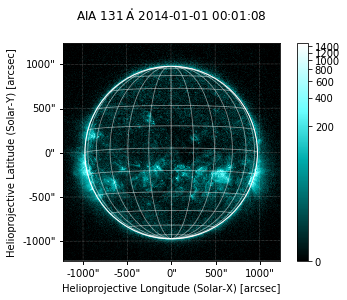

In [18]:
%matplotlib inline
import sunpy.map
import matplotlib.pyplot as plt

aia = sunpy.map.Map(downloaded_files[4])

mplot = aia.plot()
aia.draw_grid()
aia.draw_limb()
plt.clim(0,1500)
plt.colorbar()

<CoordinatesMap with 2 world coordinates:

  index aliases    type   unit wrap format_unit visible
  ----- ------- --------- ---- ---- ----------- -------
      0     lon longitude  deg  180         deg     yes
      1     lat  latitude  deg None         deg     yes

>

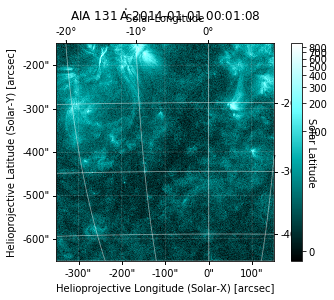

In [20]:
%matplotlib inline
from astropy.coordinates import SkyCoord

length = 250 * u.arcsec
x0 = -100 * u.arcsec
y0 = -400 * u.arcsec

bottom_left = SkyCoord(x0 - length, y0 - length,
                       frame=aia.coordinate_frame)
top_right = SkyCoord(x0 + length, y0 + length,
                     frame=aia.coordinate_frame)
submap = aia.submap(bottom_left, top_right)

smplt = submap.plot()
plt.colorbar()
submap.draw_grid(grid_spacing=10*u.deg)

# Finding and studying an Active Region (AR) (WARNING: temporarily out of order)

Information about the Heliophysics Events Knowledgebase (HEK) can be found in the [project's web page](https://www.lmsal.com/hek/index.html).

In [34]:
## WARNING: Unfortunatelly the present version of SunPy has a bug
# That will be corrected over the weekend of 21/03/2020. Please make
# sure to update to the latest version of SunPy to use this client
##

from sunpy.net import hek
client = hek.HEKClient()

tstart = '2014/01/01 00:00:00'
tend = '2014/01/01 00:01:00'
event_type = 'AR'
result = client.search(hek.attrs.Time(tstart,tend),hek.attrs.EventType(event_type))

n = len(result)
print("We found %i events in this period of time." % (n))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 10559: invalid continuation byte

The list of possible EventTypes can be found in [this link](http://www.lmsal.com/hek/VOEvent_Spec.html). Each event type has also a comprehensive list of properties associated, including a bounding box and derived physical parameters.

In [35]:
boxes = [[elem['kb_archivid'][-5:],
          elem['boundbox_c1ll'],
          elem['boundbox_c2ll'],
          elem['boundbox_c1ur'],
          elem['boundbox_c2ur']
         ] for elem in result]
for _ in boxes:
    print(_)

NameError: name 'result' is not defined

<div class="alert alert-block alert-warning">
<b>Exercise:</b> Select an active region, download data from the HMI instrument of SDO and plot the region to show only this particular active region.
</div>

# Carrington maps

JSOC also produces carrington maps from the HMI instrumend onboard SDO:

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.utils.data import download_file
import sunpy.map

carr = '2191'
filename = download_file('http://jsoc.stanford.edu/data/hmi/synoptic/hmi.Synoptic_Mr.'+carr+'.fits', cache=True)

syn_map = sunpy.map.Map(filename)

This file is formatted in a special way at the JSOC. To plot the figure we have to make three adjustments and a data normalization:

In [46]:
syn_map.meta['CUNIT2'] = 'degree'
syn_map.meta['CDELT2'] = 180 / np.pi * syn_map.meta['CDELT2']
syn_map.meta['CDELT1'] *= -1

syn_map.plot_settings['cmap'] = 'hmimag'
syn_map.plot_settings['norm'] = plt.Normalize(-1500, 1500)

And now we can plot the map:

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
  'degree' -> 'deg',
  'degree' -> 'deg'. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
  'degree' -> 'deg',
  'degree' -> 'deg'. [astropy.wcs.wcs]


Text(0.5, 1.0, 'Carrington Synoptic Chart Of Br Field 2191-2192')

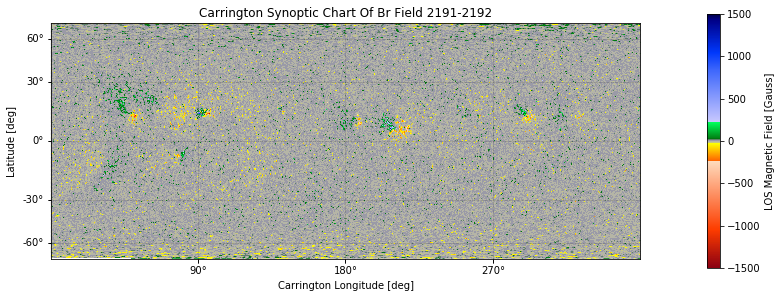

In [47]:
%matplotlib inline
fig = plt.figure(figsize=(12, 5))
axes = plt.subplot(projection=syn_map)

# Plot the image
im = syn_map.plot()

# Set up the Sine Latitude Grid
x = axes.coords[0]
y = axes.coords[1]

x.set_coord_type('longitude', coord_wrap=360.)
y.set_coord_type('latitude')

x.set_major_formatter('dd')
y.set_major_formatter('dd')

x.set_axislabel("Carrington Longitude [deg]")
y.set_axislabel("Latitude [deg]")

#x.set_ticks(color='black', exclude_overlapping=True)
#y.set_ticks(color='black', exclude_overlapping=True)
x.set_ticks(color='black')
y.set_ticks(color='black')

# Hide the grid
axes.coords.grid(color='black', alpha=0.6, linestyle='dotted', linewidth=0.5)

# Create a colorbar
cb = plt.colorbar(im, fraction=0.019, pad=0.1)
cb.set_label("LOS Magnetic Field [Gauss]")

# Make the ticks draw on the RHS
axes.set_ylim((1, syn_map.data.shape[0] - 1))

plt.title("{} {}-{}".format(syn_map.meta['content'], syn_map.meta['CAR_ROT'],
                            syn_map.meta['CAR_ROT'] + 1))

To obtain the value of the Line Of Sight (LOS) magnetic field in the carrington map, you can create a submap and extract the mean, maximum, or mimimum values in the submap using the code bellow:

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
  'degree' -> 'deg',
  'degree' -> 'deg'. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
  'degree' -> 'deg',
  'degree' -> 'deg'. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
  'degree' -> 'deg',
  'degree' -> 'deg'. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
  'degree' -> 'deg',
  'degree' -> 'deg'. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
  'degree' -> 'deg',
  'degree' -> 'deg'. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
  'degree' -> 'deg',
  'degree' -> 'deg'

The mean value in this area is: -1.075792
The maxm value in this area is: 279.139008
The minm value in this area is: -350.256531


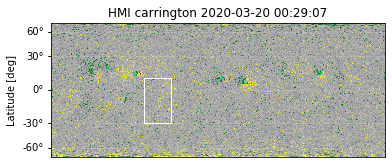

In [48]:
from astropy.coordinates import SkyCoord
import astropy.units as u

width = 30 * u.deg
height = 40 * u.deg
x0 = 100 * u.deg
y0 = -30 * u.deg
bottom_left = SkyCoord(x0, y0, frame=syn_map.coordinate_frame)
top_right = SkyCoord(x0 + width, y0 + height, frame=syn_map.coordinate_frame)

syn_map.plot()
syn_map.draw_rectangle(bottom_left, width, height)

sub_syn_map = syn_map.submap(bottom_left, top_right)
mea = sub_syn_map.mean()
maa = sub_syn_map.max()
mii = sub_syn_map.min()
print("The mean value in this area is: %f" % (mea))
print("The maxm value in this area is: %f" % (maa))
print("The minm value in this area is: %f" % (mii))

# CME catalogs

Over the years, and thanks to the extensive use of coronagraphs, scientists have produce a number of CME catalogs. These contain the date of occurrence but also information about their Central Position Angle (CPA), angular width, speed and acceleration, amorng others.

There are two main catalogs in use today:

1. The [SOHO/LASCO CME catalog](https://cdaw.gsfc.nasa.gov/CME_list/): a manualy created catalog.
2. The [CACTus CME catalog](http://sidc.oma.be/cactus/catalog.php): an automatic CME detection catalog.

Details about how coronagraph images are automatically transformed into events in the CACTus catalog can be found in this paper by [Bonte et al. (2011)](https://link.springer.com/article/10.1007%2Fs11207-011-9740-7).

# Data at 1 AU with OMNIweb

The [website OMNIweb](https://omniweb.gsfc.nasa.gov/) keeps a long record of information about the solar wind, measured by in-situ satellites

Lets find what measurements were capture on the days after the Halloween storm.

# Performing simulations of the full Sun-Earth system

The [Community Coordinated Modeling Center](https://ccmc.gsfc.nasa.gov/) (CCMC) is an inter-institutional system, supported by NASA, where multiple numerical models of the heliosphere can be used.

The Sun-Earth system can be broadly divided in four parts:

<img src="https://svs.gsfc.nasa.gov/vis/a030000/a030400/a030481/EarthSunSystem_HW.jpg" alt="Alt text that describes the graphic" title="Title text" />

| Property | Inner solar atmosphere | Heliosphere | Magnetosphere | Ionosphere |
|:---------|:----------------------:|:-----------:|:-------------:|:----------:|
| Boundaries | < $20$ $R_S$ (0.1 AU) | > $20$ $R_S$ | ~ $1$-$100$ $R_E$ | < $2000$ Km |
| Density | $10^{10}$ - $10^7$ $cm^{-3}$ | $3$ - $10$ $cm^{-3}$ | $0.5$ - $100$ $cm^{-3}$ | > 200 $cm^{-3}$ |
| Temperature | $10^{3}$ - $10^6$ K | $10^{4}$ - $10^5$ K | $10^{5}$ - $10^7$ K | $10^5$ K |
| Plasma $\beta$ | < 0.01 | ~ 1 | ~ 0.1 | ~ 1 |

Different regions of the heliosphere can be described by different numerical models:

- In the inner-heliosphere high temperature, densities and magnetic fields are dominant.
- In the solar wind, the flow is super-magnetosonic with a very low density and a balance between internal pressure and magnetic pressure.
- In the magnetosphere the plasma is heated, turbulent and has higher density. The interaction with the magnetic field creates a separation of scales, with MHD and kinetic phenomeca co-existing.
- In the ionosphere the plasma is much denser, in particular at low altitudes. Resistivity creates a current system that controls the drifting movements of the inner magnetosphere.

A comprehensive list of all the models available at the CCMC is presented [here](https://ccmc.gsfc.nasa.gov/models/models_at_glance.php). Notice that the heliosphere is divided in the four domains listed above.

The innovation of the CCMC is that many of the models can be coupled toguether to perform full simulations of the complete Sun-Earth system.

<img src="https://images.slideplayer.com/15/4617409/slides/slide_12.jpg" alt="Alt text that describes the graphic" title="Title text" />

Today we will use the CCMC to study the propagation of a CME in the heliosphere. We will use:

- the [ENLIL with Cone Model](https://ccmc.gsfc.nasa.gov/models/modelinfo.php?model=ENLIL%20with%20Cone%20Model) to simulate the flow of the solar wind.
- the [OpenGGCM Model](https://ccmc.gsfc.nasa.gov/models/modelinfo.php?model=OpenGGCM) to study the plasma in the magnetosphere of the Earth.

## Simulation of the solar wind

To request an ENLIL run you have to go to [this webpage](https://ccmc.gsfc.nasa.gov/requests/SH/ENLIL-28/enlil_user_registration.php?run_type=cone_model) and fill the blanks.

<div class="alert alert-block alert-info">
<b>These are the main information to fill in:</b>
 <ol type="a">
  <li>Page 1: your personal information. Use the keyword <b>SOTERIA</b> to easily distringuish your runs among all the others.</li>
  <li>Page 2: Select the Carrington rotation corresponding to the date of the Halloween storm.</li>
  <li>Page 3: Insert the parameters of the CME that you want to propagate in the heliosphere. Click on <i>SUBMIT</i>.</li>
</ol> 
</div>

This will create a simulation in the system. It will take several hours to complete. You will be notified by email of the start and the completion of the job.

In the mean time lets open one resul already available in the website:

A previous user has already requested and run [this simulation](https://ccmc.gsfc.nasa.gov/database_SH/Giovanni_Lapenta_031612_SH_1.php).

<div class="alert alert-block alert-warning">
<b>Exercise:</b>
<ol type="a">
  <li>Visualize the density and velocities in the ecliptic plane.</li>
  <li>Visualize the solar wind in the meridional plane.</li>
  <li>Change the color scales and zoom in the domain in the meridional plane.</li>
  <li>Plot the velocity, density and temeprature in a 1D radial line from the Sun to the Earth.</li>
  <li>Plot in the ecliptic plane a color+contour figure with the velocity and the density.</li>
  <li>Create a GIF with the animation of the previous plot in time</li>
</div>

# Simulation of the magnetosphere

There are multiple numerical tools available to perform simulations of the magnetosphere. One of the most used MHD codes for this application is called [OpenGGCM](https://ccmc.gsfc.nasa.gov/models/modelinfo.php?model=OpenGGCM).

The model can be run independently or coupled with other tools in the CCMC website. When running as a stand alone, the inputs required to perform a run are the solar wind conditions ahead of the Earth.

Lets take a look at one simulation of the Earth magnetosphere. Open [this case](https://ccmc.gsfc.nasa.gov/results/viewrun.php?domain=GM&runnumber=Mario_Fu_091118_2) in your browser. Notice that most of the plotting tools are very similar to the ones studied above.

<div class="alert alert-block alert-warning">
<b>Exercise:</b>
<ol type="a">
  <li>Visualize the density and velocities in the ecliptic plane.</li>
  <li>Visualize the solar wind in the meridional plane.</li>
  <li>Change the color scales and zoom in the domain to see the earth closer. </li>
  <li>Plot the velocity, density and temeprature across the bow shock at the subsolar point.</li>
  <li>Visualize the ionospheric electric potentials in the north and south poles</li>
</div>